<a href="https://colab.research.google.com/github/rahulyad011/intrusion-detection/blob/main/OS_Scan_Kitsune_Network_Attack_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC

# MLP requirements 
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

# LSTM requirements 
from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# evaluation metrices
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import det_curve

# representation of model layers
from keras.utils.vis_utils import plot_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
bin_data_total = data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/kitsume_network_attack_dataset/kitsune_binary_data_1MOS_Scan_dataset.csv")
bin_data_total.drop(bin_data_total.columns[0],axis=1,inplace=True)
bin_data_total

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
0,54.958150,1342.063565,1.791089e+05,93.643990,1347.231063,1.718131e+05,281.250017,1347.183100,1.686520e+05,2803.670400,...,0.000000e+00,28029.169529,1342.168895,417.189824,1342.168895,174047.349480,0.000000e+00,0.000000e+00,1103798,0.0
1,66.987036,1234.769201,4.625320e+04,108.689706,1236.386365,4.456408e+04,312.839312,1240.641836,3.960801e+04,3060.389365,...,5.631425e-09,30563.739555,1240.044689,202.614287,1241.495401,41052.549214,-2.261136e-11,-4.137248e-08,1237226,0.0
2,53.658092,1250.629446,2.819479e+04,95.036009,1244.657330,3.549190e+04,300.988513,1240.447234,4.164899e+04,3046.106294,...,5.459875e-09,30314.480410,1241.163908,199.241768,1242.613313,39697.282137,-1.435780e-11,-2.591779e-08,358725,0.0
3,71.121618,1239.033725,4.367263e+04,111.970910,1238.955263,4.297615e+04,314.542597,1239.340079,4.186156e+04,3061.901130,...,-3.916484e-09,18537.891946,1239.841065,202.791349,1241.292014,41124.331373,1.417383e-11,2.377804e-08,67246,0.0
4,45.967084,1325.526343,1.854069e+05,83.643401,1337.577621,1.763079e+05,270.888115,1343.512541,1.718346e+05,2793.699674,...,0.000000e+00,28022.323438,1341.938317,417.317344,1341.938317,174153.765845,0.000000e+00,0.000000e+00,865153,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16974,432.234233,60.000000,1.000444e-11,781.511684,60.000000,4.092726e-12,3638.185506,60.000000,4.092726e-11,20244.754761,...,0.000000e+00,1.000000,60.000000,0.000000,84.852814,0.000000,0.000000e+00,0.000000e+00,1382270,1.0
16975,1794.595879,60.000000,2.410161e-11,2829.437759,60.000000,2.728484e-12,7004.753648,60.000000,3.547029e-11,18222.773705,...,0.000000e+00,1.000000,60.000000,0.000000,60.000000,0.000000,0.000000e+00,0.000000e+00,1370635,1.0
16976,1723.656885,60.000000,2.546585e-11,2590.220169,60.000000,2.728484e-12,6409.513773,60.000000,1.364242e-11,16450.497069,...,0.000000e+00,1.000000,60.000000,0.000000,84.852814,0.000000,0.000000e+00,0.000000e+00,1366121,1.0
16977,1806.094652,60.000000,1.273293e-11,2828.539593,60.000000,0.000000e+00,6968.384797,60.000000,3.046807e-11,18065.238201,...,0.000000e+00,1.000000,60.000000,0.000000,60.000000,0.000000,0.000000e+00,0.000000e+00,1370208,1.0


In [4]:
# distribution of label class before sampling
data_size = bin_data_total.shape[0]
# data_size
bin_data_total.label.value_counts()/data_size

0.0    0.961305
1.0    0.038695
Name: label, dtype: float64

In [5]:
model_name_suffix = "_kitsune_OS_Scan"

In [6]:
# numeric feature normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

numeric_cols = bin_data_total.select_dtypes(['number']).columns
numeric_cols = numeric_cols.drop('label')
flag = 0
scaler = None
if flag:
  # using standard scaler for normalizing
  scaler = StandardScaler()
else:
  # using minmax scaler for normalizing
  # to avoid negative values after scaling
  scaler = MinMaxScaler()

def normalization_train(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.fit_transform(arr.reshape(len(arr),1))
  return df

def normalization_test(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.transform(arr.reshape(len(arr),1))
  return df

# numeric_cols

In [7]:
# sampling data taking only 50% of the data
# bin_data = bin_data_total.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=0.5))
bin_data = bin_data_total
bin_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
0,54.958150,1342.063565,1.791089e+05,93.643990,1347.231063,1.718131e+05,281.250017,1347.183100,1.686520e+05,2803.670400,...,0.000000e+00,28029.169529,1342.168895,417.189824,1342.168895,174047.349480,0.000000e+00,0.000000e+00,1103798,0.0
1,66.987036,1234.769201,4.625320e+04,108.689706,1236.386365,4.456408e+04,312.839312,1240.641836,3.960801e+04,3060.389365,...,5.631425e-09,30563.739555,1240.044689,202.614287,1241.495401,41052.549214,-2.261136e-11,-4.137248e-08,1237226,0.0
2,53.658092,1250.629446,2.819479e+04,95.036009,1244.657330,3.549190e+04,300.988513,1240.447234,4.164899e+04,3046.106294,...,5.459875e-09,30314.480410,1241.163908,199.241768,1242.613313,39697.282137,-1.435780e-11,-2.591779e-08,358725,0.0
3,71.121618,1239.033725,4.367263e+04,111.970910,1238.955263,4.297615e+04,314.542597,1239.340079,4.186156e+04,3061.901130,...,-3.916484e-09,18537.891946,1239.841065,202.791349,1241.292014,41124.331373,1.417383e-11,2.377804e-08,67246,0.0
4,45.967084,1325.526343,1.854069e+05,83.643401,1337.577621,1.763079e+05,270.888115,1343.512541,1.718346e+05,2793.699674,...,0.000000e+00,28022.323438,1341.938317,417.317344,1341.938317,174153.765845,0.000000e+00,0.000000e+00,865153,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16974,432.234233,60.000000,1.000444e-11,781.511684,60.000000,4.092726e-12,3638.185506,60.000000,4.092726e-11,20244.754761,...,0.000000e+00,1.000000,60.000000,0.000000,84.852814,0.000000,0.000000e+00,0.000000e+00,1382270,1.0
16975,1794.595879,60.000000,2.410161e-11,2829.437759,60.000000,2.728484e-12,7004.753648,60.000000,3.547029e-11,18222.773705,...,0.000000e+00,1.000000,60.000000,0.000000,60.000000,0.000000,0.000000e+00,0.000000e+00,1370635,1.0
16976,1723.656885,60.000000,2.546585e-11,2590.220169,60.000000,2.728484e-12,6409.513773,60.000000,1.364242e-11,16450.497069,...,0.000000e+00,1.000000,60.000000,0.000000,84.852814,0.000000,0.000000e+00,0.000000e+00,1366121,1.0
16977,1806.094652,60.000000,1.273293e-11,2828.539593,60.000000,0.000000e+00,6968.384797,60.000000,3.046807e-11,18065.238201,...,0.000000e+00,1.000000,60.000000,0.000000,60.000000,0.000000,0.000000e+00,0.000000e+00,1370208,1.0


In [8]:
number_of_cols = bin_data.shape[1]

In [9]:
# distribution of label class after sampling
data_size = bin_data.shape[0]
bin_data.label.value_counts()/data_size

0.0    0.961305
1.0    0.038695
Name: label, dtype: float64

In [10]:
model_selection = {
    0 : "ALL",
    2 : "MLP",
    3 : "LSTM",
    4 : "AE"
}
model_flag = 0
svm_enable = 1

In [11]:
X = bin_data.iloc[:,0:number_of_cols] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['label'] # target attribute

In [12]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [13]:
# calling the normalization() function
X_train = normalization_train(X_train,numeric_cols)
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
8019,0.008145,2.012279e-16,4.594307e-18,0.011571,2.081668e-16,1.087246e-17,0.017156,3.816392e-16,1.574648e-17,0.044900,...,0.612504,0.441612,1.609823e-15,1.820131e-08,0.915196,0.140630,0.995232,0.619580,0.640342,0.0
11958,0.025133,9.563047e-01,6.629782e-01,0.030105,9.680755e-01,6.472688e-01,0.038483,9.872673e-01,6.177888e-01,0.093973,...,0.617746,0.814097,9.923437e-01,7.797367e-01,0.992344,0.607989,0.500428,0.575493,0.093552,0.0
7563,0.019242,9.117859e-01,8.491086e-01,0.025504,9.403765e-01,7.698193e-01,0.036525,9.771874e-01,6.696007e-01,0.093593,...,0.617746,0.914781,9.923303e-01,7.805755e-01,0.992330,0.609298,0.500428,0.575493,0.621423,0.0
8046,0.021886,8.996973e-01,1.097116e-01,0.028806,9.091257e-01,1.050649e-01,0.040088,9.180940e-01,1.117924e-01,0.101618,...,0.544963,0.995490,9.144577e-01,3.733398e-01,0.915580,0.139383,0.545521,0.588225,0.309422,0.0
6535,0.022587,9.019510e-01,8.810102e-02,0.030419,9.066210e-01,1.094677e-01,0.041561,9.143790e-01,1.283640e-01,0.102179,...,0.637121,0.997333,9.139366e-01,3.759590e-01,0.915060,0.141345,0.586781,0.602402,0.892015,0.0


In [14]:
# calling the normalization() function
X_test = normalization_test(X_test,numeric_cols)
X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
9567,0.000008,0.000707,0.019993,0.000033,0.000706,0.021007,0.000154,0.000705,0.022620,0.001774,...,-0.000027,0.017976,0.000703,0.000092,0.000704,0.024173,-0.000027,-0.000027,0.550712,0.0
5589,0.000011,0.000706,0.022572,0.000033,0.000706,0.022485,0.000150,0.000704,0.023520,0.001767,...,-0.000027,0.017958,0.000704,0.000091,0.000705,0.023707,-0.000027,-0.000027,0.423508,0.0
12114,-0.000012,0.000008,-0.000027,-0.000001,0.000008,-0.000027,0.000052,0.000008,-0.000027,0.000772,...,-0.000027,0.007964,0.000008,-0.000027,0.000705,0.023234,-0.000027,-0.000027,0.469737,0.0
6649,0.000018,0.000777,0.096947,0.000039,0.000771,0.099722,0.000149,0.000765,0.101965,0.001637,...,-0.000027,0.016491,0.000763,0.000219,0.000763,0.102887,-0.000027,-0.000027,0.320169,0.0
3860,0.000019,0.000699,0.030646,0.000042,0.000700,0.029540,0.000160,0.000701,0.027178,0.001780,...,-0.000027,0.017982,0.000703,0.000092,0.000704,0.024225,-0.000027,-0.000027,0.550315,0.0


## **Linear Support Vector Machine Classifier (Binary Classification) **
to enable make the svm_enable = 1 in the above cell

In [15]:
if svm_enable:
  # using kernel as linear 
  lsvm = SVC(kernel='linear',gamma='auto') 
  lsvm.fit(X_train,y_train) # training model on training dataset

In [16]:
if svm_enable:
  pkl_filename = "/content/drive/MyDrive/Colab_Notebooks/Models/lsvm_binary"+model_name_suffix+".pkl"
  if (not path.isfile(pkl_filename)):
    # saving the trained model to disk
    with open(pkl_filename, 'wb') as file:
      pickle.dump(lsvm, file)
    print("Saved model to disk")
    # loading the trained model from disk
    with open(pkl_filename, 'rb') as file:
      lsvm = pickle.load(file)
    print("Loaded model from disk") 

Saved model to disk
Loaded model from disk


In [17]:
if svm_enable:
  y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
  ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
  print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  60.51825677267373


In [18]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     random_state=0)
# cm = confusion_matrix(y_test, y_pred, labels=lsvm.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=lsvm.classes_)
# disp.plot()

# plt.show()

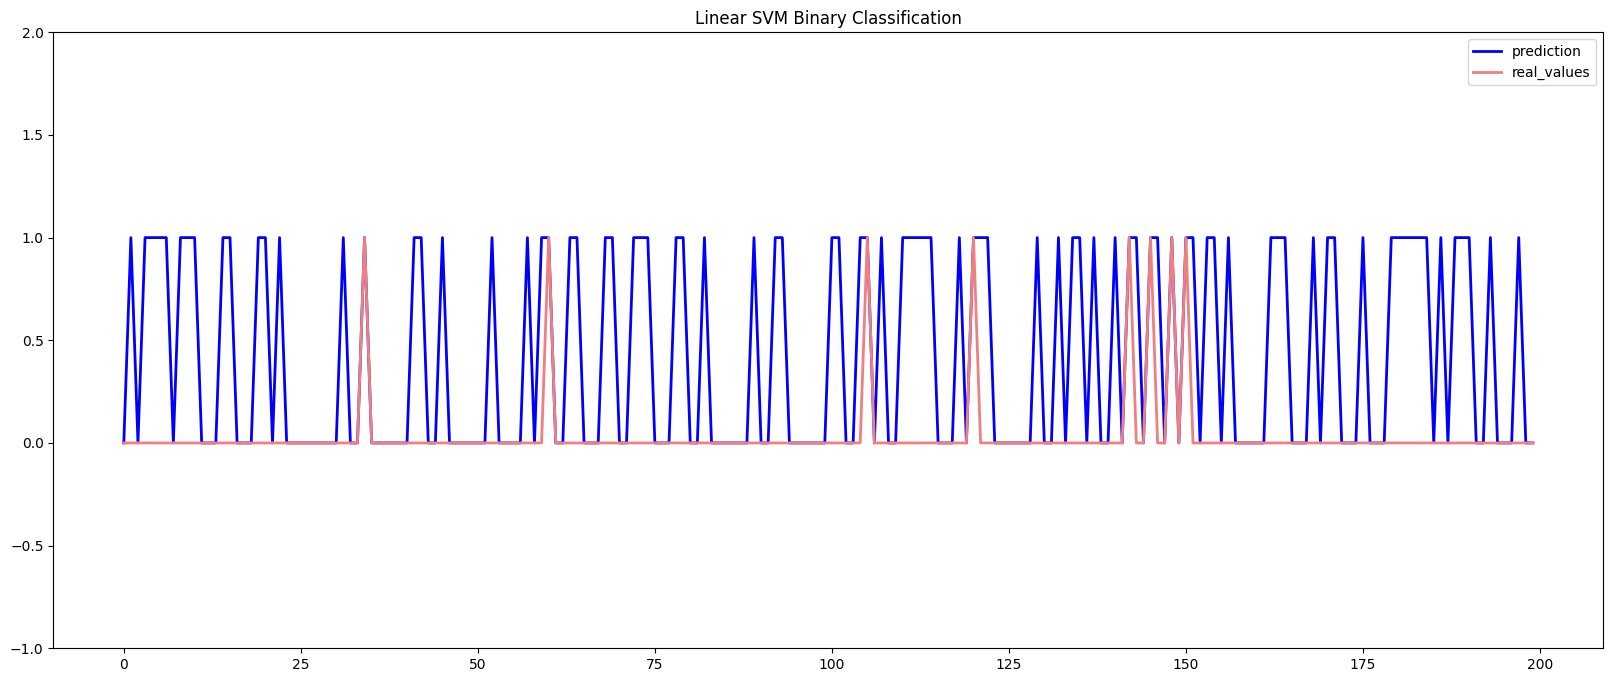

In [19]:
if svm_enable:
  plt.figure(figsize=(20,8))
  plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
  plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
  plt.legend(loc="best")
  plt.ylim((-1,2))
  plt.title("Linear SVM Binary Classification")
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lsvm_real_pred_bin.png')
  plt.show()

In [20]:
if svm_enable:
  target_names = ['class 0', 'class 1']
  print(classification_report(y_test, y_pred, target_names=target_names))
  fpr, fnr, thresholds = det_curve(y_test, y_pred)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

              precision    recall  f1-score   support

     class 0       1.00      0.59      0.74      4068
     class 1       0.10      1.00      0.17       177

    accuracy                           0.61      4245
   macro avg       0.55      0.79      0.46      4245
weighted avg       0.96      0.61      0.72      4245

False Positive Rate -  [0.41199607]
False Negative Rate -  [0.]
Thresholds -  [1.]


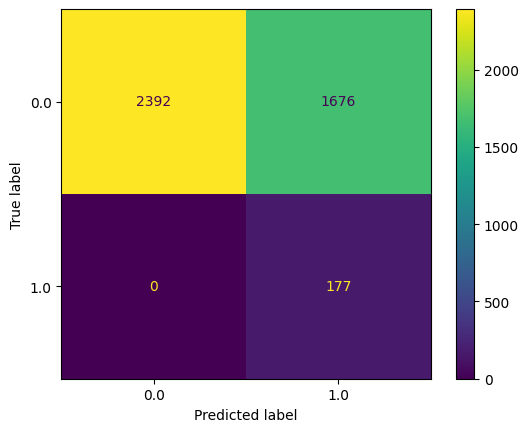

In [21]:
if svm_enable:
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

  clf = lsvm
  cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=clf.classes_)
  disp.plot()

  plt.show()

## **Multi Layer Perceptron Classifier (Binary Classification)**

In [22]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  mlp = Sequential() # creating model

  # adding input layer and first layer with 50 neurons
  mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
  # output layer with sigmoid activation
  mlp.add(Dense(units=1,activation='sigmoid'))

In [23]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # summary of model layers
  mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                5900      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,951
Trainable params: 5,951
Non-trainable params: 0
_________________________________________________________________


In [25]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # training the model on training dataset
  history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 6s 114ms/step - loss: 0.4392 - accuracy: 0.9627 - val_loss: 0.3084 - val_accuracy: 0.9607
Epoch 2/100
3/3 [==============================] - 0s 29ms/step - loss: 0.2870 - accuracy: 0.9627 - val_loss: 0.2078 - val_accuracy: 0.9607
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 0.1947 - accuracy: 0.9627 - val_loss: 0.1494 - val_accuracy: 0.9607
Epoch 4/100
3/3 [==============================] - 0s 29ms/step - loss: 0.1418 - accuracy: 0.9627 - val_loss: 0.1184 - val_accuracy: 0.9607
Epoch 5/100
3/3 [==============================] - 0s 33ms/step - loss: 0.1137 - accuracy: 0.9627 - val_loss: 0.1014 - val_accuracy: 0.9607
Epoch 6/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0983 - accuracy: 0.9627 - val_loss: 0.0911 - val_accuracy: 0.9607
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0888 - accuracy: 0.9627 - val_loss: 0.0840 - val_accuracy: 0.9607
Epoch 8/100
3/3 [==

In [26]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/mlp_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/mlp_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    mlp_json = mlp.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(mlp_json)

    # serialize weights to HDF5
    mlp.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    mlp = model_from_json(loaded_model_json)

    # load weights into new model
    mlp.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [27]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # predicting target attribute on testing dataset
  test_results = mlp.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

133/133 [==============================] - 1s 2ms/step - loss: 1114223.0000 - accuracy: 0.2580
Test results - Loss: 1114223.0 - Accuracy: 25.79505443572998


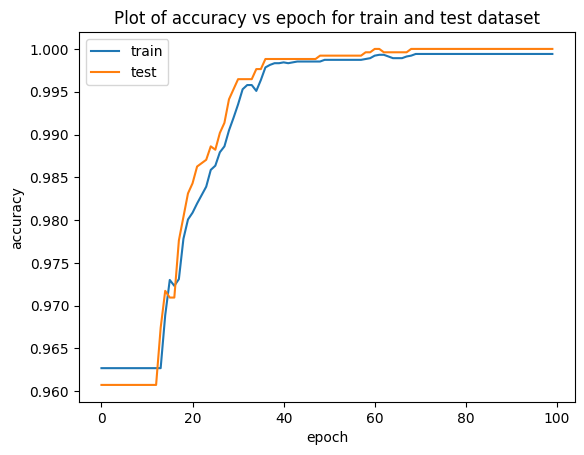

In [29]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":  
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_accuracy.png')
  plt.show()

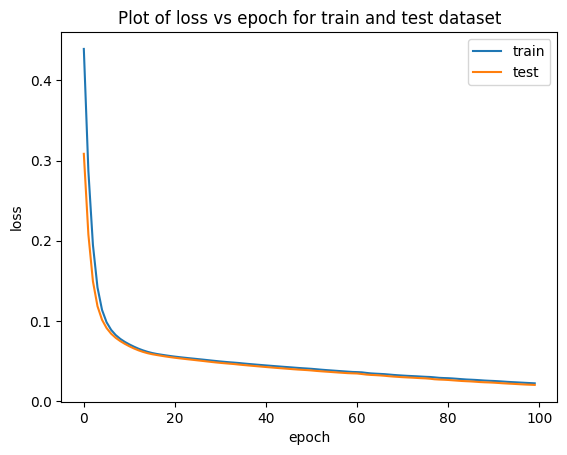

In [30]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Plot of loss vs epoch for train and test dataset')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_loss.png')
  plt.show()

In [31]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # representation of model layers
  from keras.utils.vis_utils import plot_model
  plot_model(mlp, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary.png', show_shapes=True,)

In [32]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_pred = mlp.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  auc = auc(fpr, tpr)

133/133 [==============================] - 0s 2ms/step


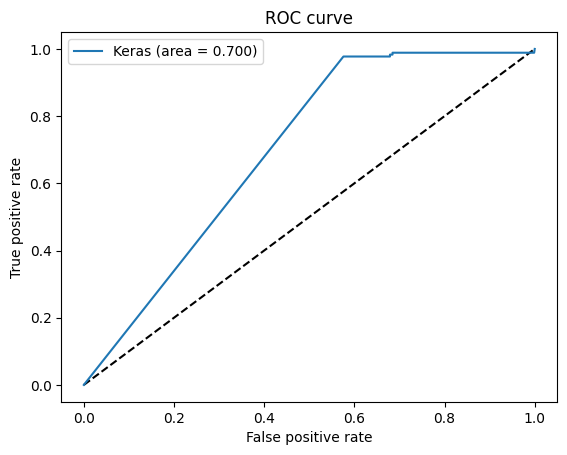

In [33]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_roc.png')
  plt.show()

In [34]:
# real_data_kdd = bin_data.copy()

# # Names of the columns that are discrete
# cat_cols = real_data_kdd.select_dtypes(['object']).columns
# # cat_cols
# test_data = real_data_kdd.iloc[:999]

# corr= test_data.corr()
# corr_y = abs(corr['label'])
# highest_corr = corr_y
# highest_corr.sort_values(ascending=True)

In [35]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_classes = (mlp.predict(X_test)>0.5).astype('int32')

133/133 [==============================] - 0s 2ms/step


In [36]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  0.9887005649717514
F1 Score -  0.1
Precision Score -  0.05266325609389106
False Positive Rate -  [1.         0.77384464]
False Negative Rate -  [0.         0.01129944]
Thresholds -  [0 1]


              precision    recall  f1-score   support

           0       1.00      0.23      0.37      4068
           1       0.05      0.99      0.10       177

    accuracy                           0.26      4245
   macro avg       0.53      0.61      0.23      4245
weighted avg       0.96      0.26      0.36      4245



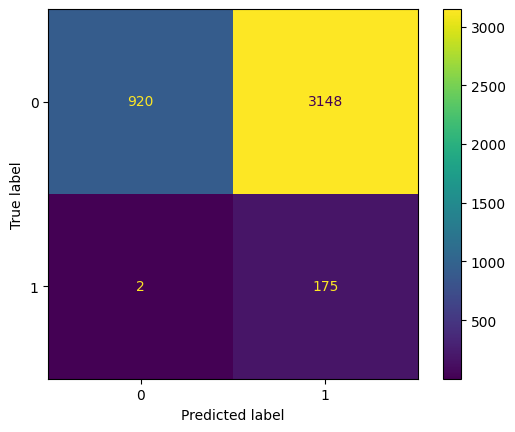

In [37]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

# **Correlation** Matrix of Features

In [38]:
corr= bin_data.corr()
corr_y = abs(corr['label'])
highest_corr = corr_y[corr_y >0.3]
highest_corr.sort_values(ascending=True)

X110     0.339614
X103     0.339618
X96      0.339664
X89      0.339721
X82      0.339735
X29      0.339935
X14      0.339935
X11      0.339943
X26      0.339943
X60      0.339994
X53      0.339998
X8       0.340021
X23      0.340021
X46      0.340043
X5       0.340090
X20      0.340090
X39      0.340094
X2       0.340102
X17      0.340102
X32      0.340104
X81      0.459325
X109     0.477019
X88      0.492697
X102     0.514175
X95      0.514594
X10      0.601990
X25      0.601990
X52      0.601991
X75      0.601991
X31      0.607484
X66      0.607484
X1       0.607485
X16      0.607485
X38      0.620184
X69      0.620184
X4       0.620186
X19      0.620186
X72      0.644976
X45      0.644976
X7       0.644979
X22      0.644979
X112     0.677736
X105     0.677764
X98      0.678061
X91      0.678485
X84      0.678666
X62      0.679809
X55      0.679836
X48      0.680131
X41      0.680542
X34      0.680706
label    1.000000
Name: label, dtype: float64

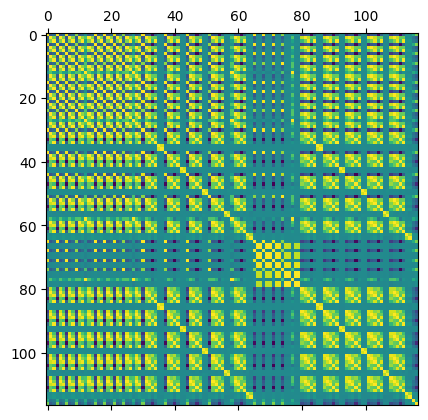

In [39]:
plt.matshow(corr)
plt.show()

## **LSTM Classifier**

In [40]:
X_train = np.array(X_train)
X_test = np.array(X_test)
# y_train.shape   #(18896,)
X_train.shape

(12734, 117)

In [41]:
y_train = np.array(y_train)
type(y_train)

numpy.ndarray

In [42]:
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
x_train.shape

(12734, 1, 117)

In [43]:
x_train.shape[2]

117

In [44]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
x_test.shape

(4245, 1, 117)

In [45]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  lst = Sequential()
  # input layer and LSTM layer with 50 neurons
  input_features = x_train.shape[2]
  lst.add(LSTM(50,input_dim=input_features))

  # outpute layer with sigmoid activation
  lst.add(Dense(1,activation='sigmoid'))

In [46]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # summary of model layers
  lst.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                33600     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 33,651
Trainable params: 33,651
Non-trainable params: 0
_________________________________________________________________


In [48]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # training the model on training dataset
  history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 5s 250ms/step - loss: 0.5942 - accuracy: 0.9602 - val_loss: 0.4654 - val_accuracy: 0.9607
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 0.4428 - accuracy: 0.9627 - val_loss: 0.3490 - val_accuracy: 0.9607
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 0.3328 - accuracy: 0.9627 - val_loss: 0.2677 - val_accuracy: 0.9607
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: 0.2563 - accuracy: 0.9627 - val_loss: 0.2124 - val_accuracy: 0.9607
Epoch 5/100
3/3 [==============================] - 0s 24ms/step - loss: 0.2042 - accuracy: 0.9627 - val_loss: 0.1750 - val_accuracy: 0.9607
Epoch 6/100
3/3 [==============================] - 0s 30ms/step - loss: 0.1690 - accuracy: 0.9627 - val_loss: 0.1494 - val_accuracy: 0.9607
Epoch 7/100
3/3 [==============================] - 0s 23ms/step - loss: 0.1448 - accuracy: 0.9627 - val_loss: 0.1316 - val_accuracy: 0.9607
Epoch 8/100
3/3 [==

In [49]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/lst_binary_kitsune'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/lst_binary_kitsune'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    lst_json = lst.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(lst_json)

    # serialize weights to HDF5
    lst.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    lst = model_from_json(loaded_model_json)

    # load weights into new model
    lst.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [50]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

Loaded model from disk


In [51]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # predicting target attribute on testing dataset
  test_results = lst.evaluate(x_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

133/133 [==============================] - 2s 4ms/step - loss: 1.9547 - accuracy: 0.2052
Test results - Loss: 1.9546605348587036 - Accuracy: 20.518256723880768%


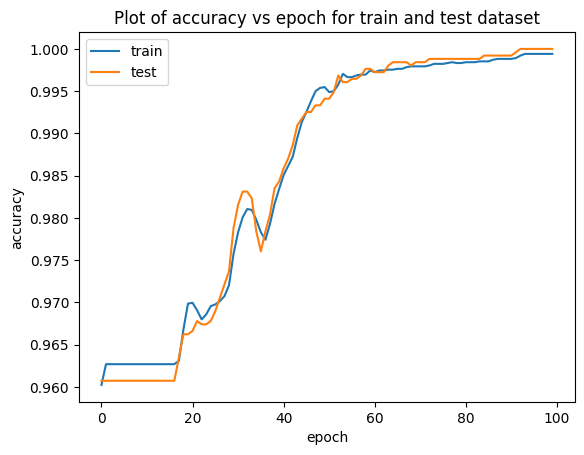

In [53]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_accuracy.png')
  plt.show()

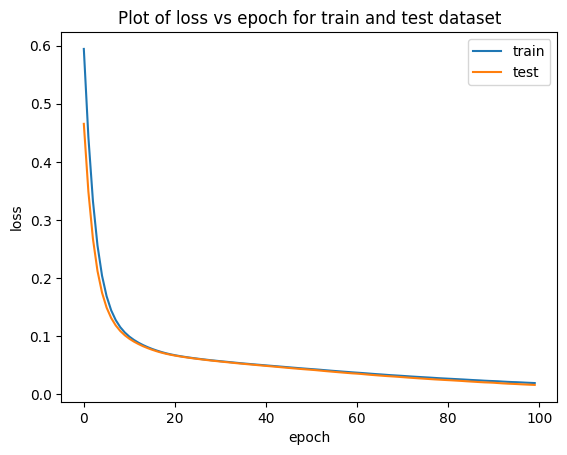

In [54]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_loss.png')
  plt.show()

In [55]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # representation of model layers
  plot_model(lst, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary.png', show_shapes=True,)

In [56]:
y_test = np.array(y_test)
y_test.shape

(4245,)

In [57]:
type(y_test)

numpy.ndarray

In [58]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  y_classes = (lst.predict(x_test)>0.5).astype('int32')

133/133 [==============================] - 1s 2ms/step


In [59]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  1.0
F1 Score -  0.09495708154506437
Precision Score -  0.04984511405237961
False Positive Rate -  [0.8294002]
False Negative Rate -  [0.]
Thresholds -  [1]


              precision    recall  f1-score   support

           0       1.00      0.17      0.29      4068
           1       0.05      1.00      0.09       177

    accuracy                           0.21      4245
   macro avg       0.52      0.59      0.19      4245
weighted avg       0.96      0.21      0.28      4245



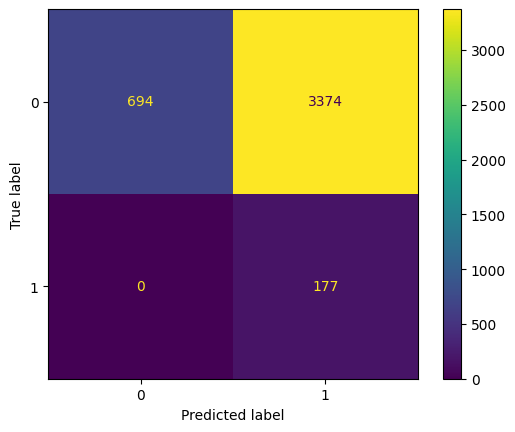

In [60]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

## **Auto Encoder**

In [61]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # splitting the dataset 75% for training and 25% testing
  X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [62]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_train = X_train.drop(['label'],axis=1) 

  y_test = X_test['label'] # target attribute

  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_test = X_test.drop(['label'],axis=1)
  # calling the normalization() function
  X_train = normalization_train(X_train,numeric_cols)
  X_test = normalization_test(X_test,numeric_cols)
  X_train = X_train.values
  X_test = X_test.values
  y_test = y_test.values

In [63]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  input_dim = X_train.shape[1]
  encoding_dim = 50

  #input layer
  input_layer = Input(shape=(input_dim, ))
  #encoding layer with 50 neurons
  encoder = Dense(encoding_dim, activation="relu")(input_layer)           
  #decoding and output layer
  output_layer = Dense(input_dim, activation='softmax')(encoder)

In [64]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  autoencoder = Model(inputs=input_layer, outputs=output_layer)

  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [65]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 116)]             0         
                                                                 
 dense_3 (Dense)             (None, 50)                5850      
                                                                 
 dense_4 (Dense)             (None, 116)               5916      
                                                                 
Total params: 11,766
Trainable params: 11,766
Non-trainable params: 0
_________________________________________________________________


In [66]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
26/26 [==============================] - 1s 11ms/step - loss: 0.3118 - accuracy: 0.0087 - val_loss: 6320268251234304.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 0.3084 - accuracy: 0.0379 - val_loss: 6320268251234304.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 0.3071 - accuracy: 0.0240 - val_loss: 6320268251234304.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
26/26 [==============================] - 0s 5ms/step - loss: 0.3065 - accuracy: 0.0879 - val_loss: 6320268251234304.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
26/26 [==============================] - 0s 5ms/step - loss: 0.3062 - accuracy: 0.2136 - val_loss: 6320268251234304.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
26/26 [==============================] - 0s 5ms/step - loss: 0.3062 - accuracy: 0.2996 - val_loss: 6320268251234304.0000 - val_accuracy: 0.0000e+00
Epoch 7/100
26/26 [====================

In [67]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    autoencoder_json = autoencoder.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(autoencoder_json)

    # serialize weights to HDF5
    autoencoder.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    autoencoder = model_from_json(loaded_model_json)

    # load weights into new model
    autoencoder.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [68]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [69]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

133/133 [==============================] - 1s 3ms/step - loss: 6320267714363392.0000 - accuracy: 0.0160
Test results - Loss: 6320267714363392.0 - Accuracy: 0.01601884514093399%


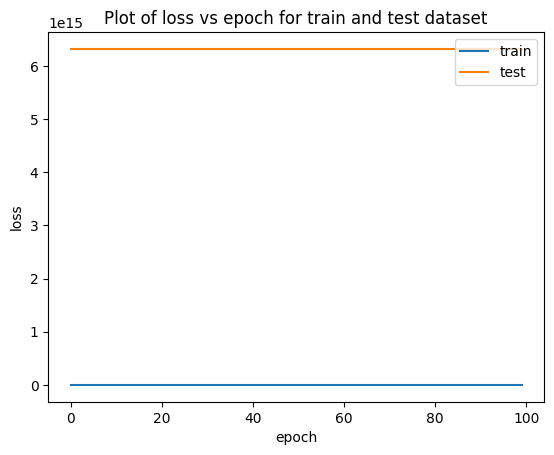

In [70]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_loss.png')
  plt.show()

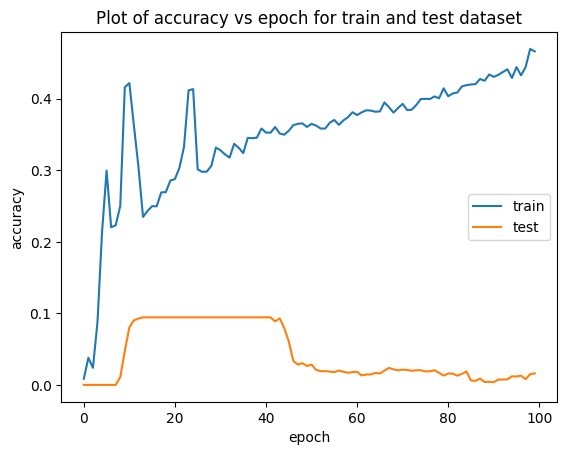

In [71]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_accuracy.png')
  plt.show()

In [72]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(autoencoder, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary.png', show_shapes=True,)

In [73]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # calculating reconstruction error 
  predictions = autoencoder.predict(X_test)

133/133 [==============================] - 0s 2ms/step


In [74]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  mse = np.mean(np.power(X_test - predictions, 2), axis=1)
  error_df = pd.DataFrame({'reconstruction_error': mse,
                           'true_class': y_test})

In [75]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  error_df.describe()
  print(predictions.shape)

(4245, 116)


## **AE Classifier**

In [76]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  i_dim = predictions.shape[1]

  #input layer
  i_layer = Input(shape=(i_dim, ))
  #hidden layer with 50 neurons
  fvector = Dense(50, activation="sigmoid")(i_layer)                    
  #doutput layer
  o_layer = Dense(1, activation='sigmoid')(fvector)

In [77]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  ae_classifier = Model(inputs=i_layer, outputs=o_layer)

  # defining loss function, optimizer, metrics and then compiling model
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  ae_classifier.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 116)]             0         
                                                                 
 dense_5 (Dense)             (None, 50)                5850      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [79]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  his = ae_classifier.fit(predictions, y_test, epochs=300,batch_size=500, validation_split=0.2).history

Epoch 1/300
7/7 [==============================] - 1s 32ms/step - loss: 1.7315 - accuracy: 0.0424 - val_loss: 1.6415 - val_accuracy: 0.0389
Epoch 2/300
7/7 [==============================] - 0s 13ms/step - loss: 1.5699 - accuracy: 0.0424 - val_loss: 1.4832 - val_accuracy: 0.0389
Epoch 3/300
7/7 [==============================] - 0s 9ms/step - loss: 1.4159 - accuracy: 0.0424 - val_loss: 1.3345 - val_accuracy: 0.0389
Epoch 4/300
7/7 [==============================] - 0s 12ms/step - loss: 1.2720 - accuracy: 0.0424 - val_loss: 1.1961 - val_accuracy: 0.0389
Epoch 5/300
7/7 [==============================] - 0s 12ms/step - loss: 1.1391 - accuracy: 0.0424 - val_loss: 1.0689 - val_accuracy: 0.0389
Epoch 6/300
7/7 [==============================] - 0s 9ms/step - loss: 1.0176 - accuracy: 0.0424 - val_loss: 0.9536 - val_accuracy: 0.0389
Epoch 7/300
7/7 [==============================] - 0s 11ms/step - loss: 0.9079 - accuracy: 0.0424 - val_loss: 0.8505 - val_accuracy: 0.0389
Epoch 8/300
7/7 [=====

In [80]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_classifier_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_classifier_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    ae_classifier_json = ae_classifier.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(ae_classifier_json)

    # serialize weights to HDF5
    ae_classifier.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    ae_classifier = model_from_json(loaded_model_json)

    # load weights into new model
    ae_classifier.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [81]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [82]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

133/133 [==============================] - 1s 2ms/step - loss: 0.4238 - accuracy: 0.9583
Test results - Loss: 0.4237979054450989 - Accuracy: 95.83038687705994%


In [83]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(ae_classifier, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary.png', show_shapes=True)

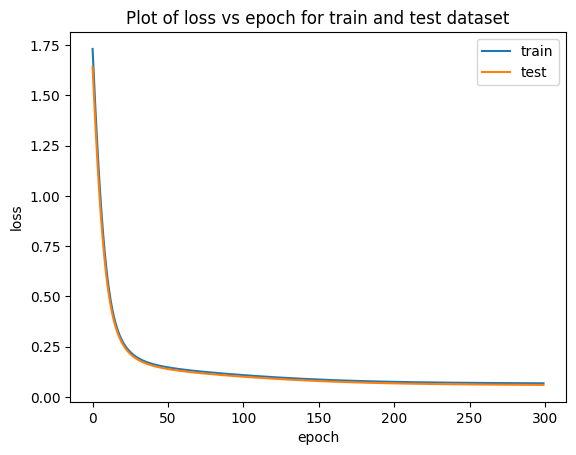

In [84]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(his['loss'])
  plt.plot(his['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_loss.png')
  plt.show()

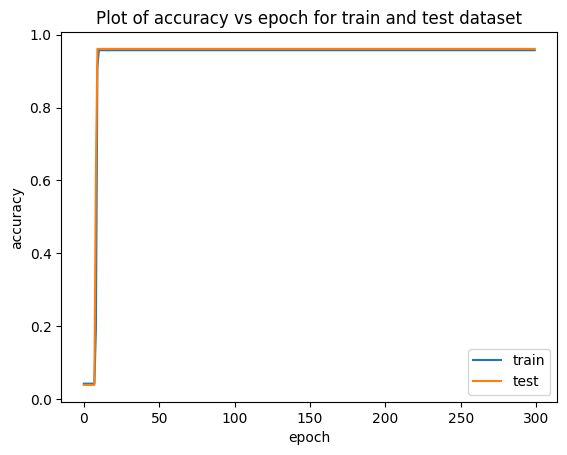

In [85]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(his['accuracy'])
  plt.plot(his['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_accuracy.png')
  plt.show()

In [86]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  y_pred = ae_classifier.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  #auc = auc(fpr, tpr)

133/133 [==============================] - 0s 1ms/step


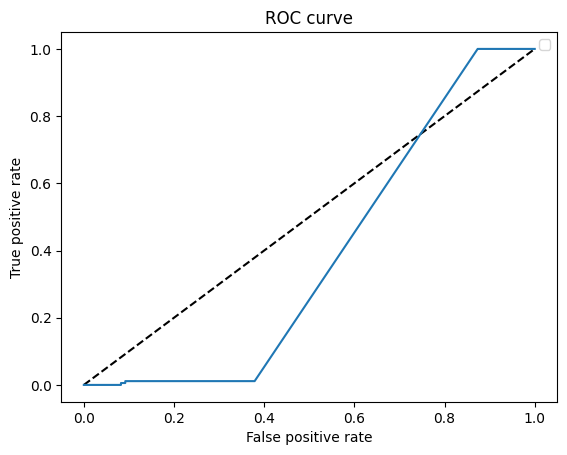

In [87]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  plt.plot([0, 1], [0, 1], 'k--')
  #plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.plot(fpr, tpr)
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_roc.png')
  plt.show()

In [88]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  pred = ae_classifier.predict(X_test)
  y_classes = (ae_classifier.predict(X_test)>0.5).astype('int32')

133/133 [==============================] - 0s 2ms/step


In [89]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  0.0
F1 Score -  0.0
Precision Score -  0.0
False Positive Rate -  [1.]
False Negative Rate -  [0.]
Thresholds -  [0]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4068
           1       0.00      0.00      0.00       177

    accuracy                           0.96      4245
   macro avg       0.48      0.50      0.49      4245
weighted avg       0.92      0.96      0.94      4245



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


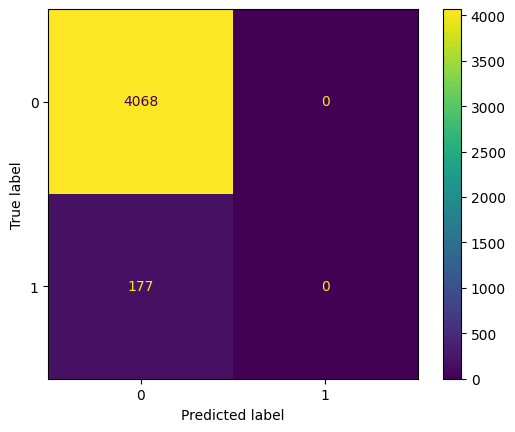

In [90]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()